       Experiment name                                File Name  \
0   ATAC-Seq alignment             Etv2KO_D2_DoubleNeg_1_S3.out   
1   ATAC-Seq alignment             Etv2KO_D2_DoubleNeg_2_S4.out   
2   ATAC-Seq alignment            Etv2KO_D3_DoubleNeg_1_S19.out   
3   ATAC-Seq alignment            Etv2KO_D3_DoubleNeg_2_S20.out   
4   ATAC-Seq alignment            Etv2KO_D3_PDGFRaPos_1_S21.out   
5   ATAC-Seq alignment            Etv2KO_D3_PDGFRaPos_2_S22.out   
6   ATAC-Seq alignment            Etv2KO_D4_DoubleNeg_1_S35.out   
7   ATAC-Seq alignment            Etv2KO_D4_DoubleNeg_2_S36.out   
8   ATAC-Seq alignment      Etv2KO_D4_DoublePos_1_Jan25_S43.out   
9   ATAC-Seq alignment            Etv2KO_D4_DoublePos_1_S41.out   
10  ATAC-Seq alignment      Etv2KO_D4_DoublePos_2_Jan25_S44.out   
11  ATAC-Seq alignment            Etv2KO_D4_DoublePos_2_S42.out   
12  ATAC-Seq alignment              Etv2KO_D4_Flk1Pos_1_S37.out   
13  ATAC-Seq alignment              Etv2KO_D4_Flk1Pos_2_S38.ou

[Text(0, 0.5, 'Alignment rate (%)'), Text(0.5, 0, 'Experiment name')]

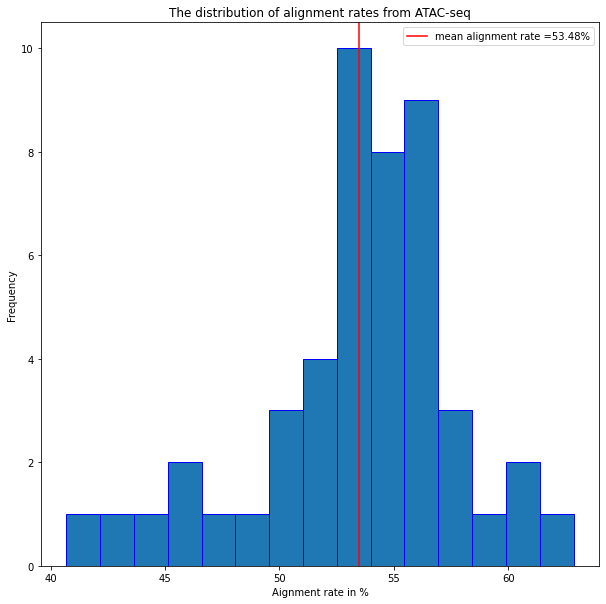

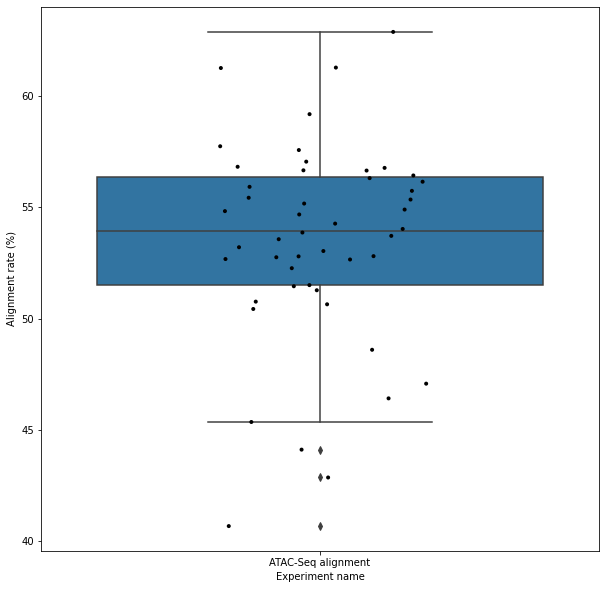

In [4]:
#Script for extracting alignment infomation form slurm output for each pair-end alignment analysis
import os
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sn
file_list = os.listdir(r"/home/garrydj/haile023/repro_out")
file_names = [i for i in file_list]


experiment_name = ['ATAC-Seq alignment']*48
pairs_aligned_zero_times = [open(
    "//home//garrydj//haile023//repro_out//"+k).readlines()[4].split(" ")[5].strip("(").strip("%)") for k in file_names]


pairs_aligned_exactly_1_time = [open(
    "//home//garrydj//haile023//repro_out//"+k).readlines()[5].split(" ")[5].strip("(").strip("%)") for k in file_names]


pairs_aligned_morethan_1_time = [open(
    "//home//garrydj//haile023//repro_out//"+k).readlines()[6].split(" ")[5].strip("(").strip("%)") for k in file_names]


overall_alignment_rate = [open(
    "//home//garrydj//haile023//repro_out//"+k).readlines()[16].split(" ")[0].strip("%") for k in file_names]


df = pd.DataFrame(list(zip(experiment_name, file_names, pairs_aligned_zero_times, pairs_aligned_exactly_1_time , pairs_aligned_morethan_1_time, overall_alignment_rate)),
                  columns=["Experiment name","File Name","pairs aligned concordantly zero times (%)", "pairs aligned concordantly exactly 1 time (%)", "pairs aligned concordantly >1 times (%)", "Overall alignment (%)"])
print(df)


df.to_excel('alignment rate for ATAC-seq.xlsx')


int_overall_allignment = [float(x) for x in df["Overall alignment (%)"]]
mean_aligmnt_rate = st.mean(int_overall_allignment)
fig, j = plt.subplots(figsize = (10, 10))
j.hist(int_overall_allignment, bins = 15, edgecolor='blue')
j.axvline(mean_aligmnt_rate, color = 'red', label = 'mean alignment rate ='+ str(round(mean_aligmnt_rate, 2)) + '%')
j.legend()
j.set_title("The distribution of alignment rates from ATAC-seq")
j.set_xlabel("Aignment rate in %")
j.set_ylabel("Frequency")

plt.subplots(figsize = (10, 10))
i = sn.boxplot(x = df["Experiment name"], y =int_overall_allignment)
i = sn.stripplot(x = df["Experiment name"], y = int_overall_allignment, color= "black", jitter=0.2, size=4 )
i.set(xlabel = "Experiment name", ylabel = 'Alignment rate (%)')